# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
file_path = './data/shopping_data_clustering.csv'
shopping_data = pd.read_csv(file_path)
shopping_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,0.718913,-0.685994,-1.394144,-0.002002,-0.285629,-0.576399,0.771136,-0.707620,1.343515,-0.907584,1.644294,-0.295206,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575,5
1,-1.648629,-0.685994,1.523236,-0.002002,0.178852,-0.436944,0.771136,-0.015163,1.343515,-0.907584,1.644294,-1.472409,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575,5
2,0.390088,-0.685994,-0.143839,-0.002002,0.558882,-0.297488,-1.496910,-0.015163,-1.328897,-0.907584,1.644294,-0.883807,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849,2
3,-1.517099,-0.685994,0.272930,1.113356,1.276716,0.957614,-0.362887,-0.015163,-1.328897,-0.349027,1.644294,0.881996,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849,2
4,0.061263,-0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.362887,1.231259,-1.328897,-1.466141,1.644294,-0.883807,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = shopping_data.drop(columns=['Cluster'])  # Fitur (tanpa label)
y = shopping_data['Cluster']                # Label hasil clustering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 3443 to 3306
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       780 non-null    float64
 1   Gender                    780 non-null    float64
 2   Item Purchased            780 non-null    float64
 3   Category                  780 non-null    float64
 4   Purchase Amount (USD)     780 non-null    float64
 5   Location                  780 non-null    float64
 6   Size                      780 non-null    float64
 7   Color                     780 non-null    float64
 8   Season                    780 non-null    float64
 9   Review Rating             780 non-null    float64
 10  Subscription Status       780 non-null    float64
 11  Payment Method            780 non-null    float64
 12  Shipping Type             780 non-null    float64
 13  Discount Applied          780 non-null    float64
 14  Promo Code 

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 712 to 2986
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   float64
 1   Gender                    3120 non-null   float64
 2   Item Purchased            3120 non-null   float64
 3   Category                  3120 non-null   float64
 4   Purchase Amount (USD)     3120 non-null   float64
 5   Location                  3120 non-null   float64
 6   Size                      3120 non-null   float64
 7   Color                     3120 non-null   float64
 8   Season                    3120 non-null   float64
 9   Review Rating             3120 non-null   float64
 10  Subscription Status       3120 non-null   float64
 11  Payment Method            3120 non-null   float64
 12  Shipping Type             3120 non-null   float64
 13  Discount Applied          3120 non-null   float64
 14  Promo Code 

In [6]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 3120 entries, 712 to 2986
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
3120 non-null   int64
dtypes: int64(1)
memory usage: 48.8 KB


In [7]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3443 to 3306
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Algoritma yang akan digunakan adalah Random Forest dan Support Vector Machine (SVM). 
Random Forest adalah algoritma ensemble learning yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting. Support vector machine (SVM) adalah salah satu algoritma machine learning yang digunakan untuk klasifikasi dan regresi. Namun, SVM lebih sering digunakan pada masalah klasifikasi.

- Inisialisasi dan Training Model Random Forest

In [8]:
# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Inisialisasi dan Training Model Support Vector Machine (SVM)

In [9]:
# Inisialisasi model
svm_model = SVC(kernel='rbf', random_state=42)

# Training
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## **b. Evaluasi Model Klasifikasi**

- Prediksi menggunakan data uji untuk algoritma Random Forest

In [10]:
# Evaluasi
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

rf_train_acc = accuracy_score(y_train, y_train_pred)
rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Random Forest - Training Accuracy: {rf_train_acc:.2%}, F1-Score: {rf_train_f1:.2%}")
print(f"Random Forest - Testing Accuracy: {rf_test_acc:.2%}, F1-Score: {rf_test_f1:.2%}")

Random Forest - Training Accuracy: 100.00%, F1-Score: 100.00%
Random Forest - Testing Accuracy: 99.90%, F1-Score: 99.90%


- Prediksi menggunakan data uji untuk algoritma Support Vector Machine (SVM)

In [11]:
# Evaluasi
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, y_train_pred_svm)
svm_test_acc = accuracy_score(y_test, y_test_pred_svm)
svm_train_f1 = f1_score(y_train, y_train_pred_svm, average='weighted')
svm_test_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')

print(f"SVM - Training Accuracy: {svm_train_acc:.2%}, F1-Score: {svm_train_f1:.2%}")
print(f"SVM - Testing Accuracy: {svm_test_acc:.2%}, F1-Score: {svm_test_f1:.2%}")

SVM - Training Accuracy: 100.00%, F1-Score: 100.00%
SVM - Testing Accuracy: 98.85%, F1-Score: 98.80%


- Melakukan Cross Validation pada model

In [12]:
scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='f1_weighted')
print(f"RF Cross-Validation F1-Score: {scores.mean():.2%}")

scores_svm = cross_val_score(SVC(random_state=42), X, y, cv=5, scoring='f1_weighted')
print(f"SVM Cross-Validation F1-Score: {scores_svm.mean():.2%}")

RF Cross-Validation F1-Score: 100.00%
SVM Cross-Validation F1-Score: 100.00%


- Visualisasi Confusion Matrix

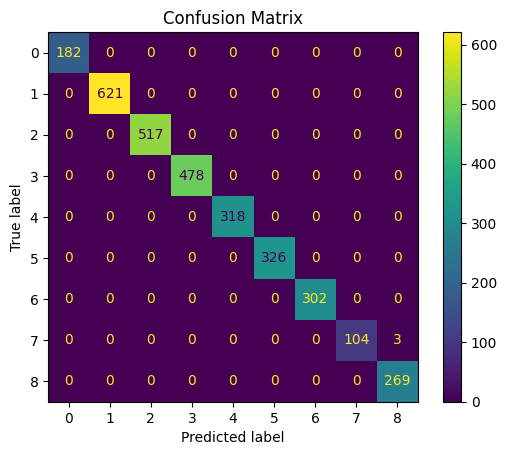

In [13]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

**Insight**
- Hasil dari data uji pada algoritma Random Forest dan SVM menunjukan hasil yang sangat baik. Dari kedua algoritma tersebut, Random Forest memberikan hasil yang lebih baik dari SVM.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

**Analisis**

- Kinerja model yang sangat baik karena memiliki hasil yang hampir sempurna
- Hasil testing accuracy pada SVM lebih rendah dibandingkan dengan RF
- Hasil yang mendekati sempurna cenderung terlihat mencurigakan, sehingga diperlukan pengujian lebih lanjut dengan data lainnya

**Rekomendasi Tindak lanjut**

- Gunakan data lain selain data yang digunakan untuk membuat clustering
- Uji coba dengan data lain
- Menggunakan algoritma Logistik Regression